In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
import torch
print(torch.__version__)

0.1.12_2


In [3]:
import basic_pytorch as b
from basic_pytorch import pt_input

# Load Up Trained Model

In [4]:
m = b.TSModel(b.lstm_timesteps, b.lstm_batchsize)

In [5]:
m.load('2017-07-09::11:41:36.pt')

In [6]:
m.eval()

TSModel (
  (c0): LSTMCell(1, 64)
  (c1): LSTMCell(64, 1)
)

# Test Some Predictions

In [7]:
from singen import SinGen

In [8]:
g = SinGen(timesteps=b.lstm_timesteps)

In [9]:
x, y = g.batch()

In [10]:
y_ = m(pt_input(x))

In [14]:
y_ = y_.data.numpy()

In [15]:
y_.shape

(1, 100)

In [16]:
res = pd.DataFrame({"predict": y_.squeeze(), "actual": y.squeeze()})

In [17]:
plt.style.use('ggplot')

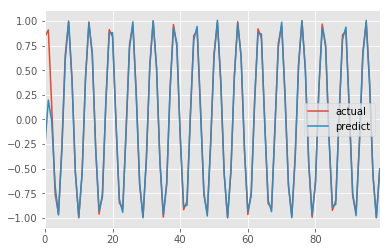

In [18]:
res.plot()

In [19]:
x, y = g.batch()
y_ = m(pt_input(x)).data.numpy()
res = pd.DataFrame({"predict": y_.squeeze(), "actual": y.squeeze()})

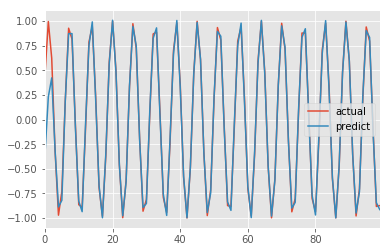

In [20]:
res.plot()

In [21]:
m

TSModel (
  (c0): LSTMCell(1, 64)
  (c1): LSTMCell(64, 1)
)

# See How Far It Can Run

In [24]:
figsize=(20, 5)

In [25]:
x, y = g.batch()

In [26]:
def gen_future(count):
    xs = []
    ys = []
    for _ in range(count):
        tx, ty = g.batch()
        xs += [i for i in tx.squeeze()]
        ys += [i for i in ty.squeeze()]
    return xs, ys

In [36]:
def pred_future(xs, count):
    timesteps = xs.shape[1]
    ys = []
    # Each time through this predict loop we get one future element
    for _ in range(count * timesteps):
        xs = m(pt_input(xs)).data.numpy()
        xs = xs.reshape(xs.shape + (1,))
        ys += [[i for i in xs.squeeze()][-1]]  # The last one is the only thing new
    return ys

In [37]:
fx, fy = gen_future(2)

## Here is what this looks like:

###  Note that the blue values are all generated from the LSTM - none of these are coming from the generator

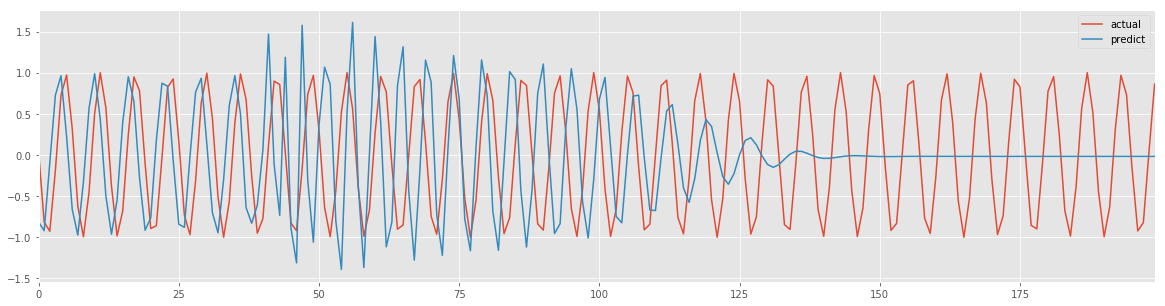

In [38]:
pd.DataFrame({'predict': pfy, 'actual': fx}).plot(figsize=figsize)

In [39]:
showpoints=10

In [40]:
pd.DataFrame({'predict y':pfy[:showpoints], 'gen x':fx[:showpoints]})

,gen x,predict y
0,0.044182,-0.814099
1,-0.816777,-0.919762
2,-0.926796,-0.088219
3,-0.184722,0.726945
4,0.727184,0.962577
5,0.970521,0.220492
6,0.321565,-0.660795
7,-0.623036,-0.973695
8,-0.994821,-0.326656
9,-0.451972,0.569966
